In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pylab as plt
import numpy as np
from eapprocessor.hwsimulator.adc import convert_array, convert_lcadc, normalize,dac

In [3]:
time = np.linspace(0, 1, 100)
signal = np.sin(2 * np.pi * time)
quantized = convert_array(signal, 1, 4, bipolar=True)
indexes, lcadc = convert_lcadc(signal, 1, 4, bipolar=True, verbose=True)

value:0.0, latest ref: 0, step:0.125
value:0.0634239196565645, latest ref: 0.0, step:0.125
value:0.12659245357374926, latest ref: 0.0, step:0.125
Append value:1
value:0.1892512443604102, latest ref: 0.125, step:0.125
value:0.2511479871810792, latest ref: 0.125, step:0.125
Append value:1
value:0.3120334456984871, latest ref: 0.25, step:0.125
value:0.3716624556603275, latest ref: 0.25, step:0.125
value:0.4297949120891717, latest ref: 0.25, step:0.125
Append value:1
value:0.4861967361004687, latest ref: 0.375, step:0.125
value:0.5406408174555976, latest ref: 0.375, step:0.125
Append value:1
value:0.5929079290546405, latest ref: 0.5, step:0.125
value:0.6427876096865394, latest ref: 0.5, step:0.125
Append value:1
value:0.6900790114821119, latest ref: 0.625, step:0.125
value:0.7345917086575333, latest ref: 0.625, step:0.125
value:0.7761464642917569, latest ref: 0.625, step:0.125
Append value:1
value:0.8145759520503357, latest ref: 0.75, step:0.125
value:0.8497254299495144, latest ref: 0.75, 

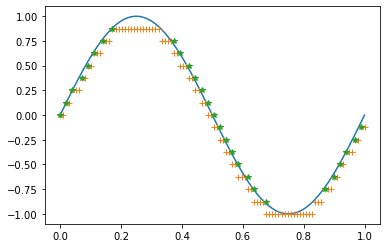

In [4]:
plt.plot(time, signal)
plt.plot(time, dac(quantized, 1,4,True),"+")
plt.plot(time[indexes], dac(lcadc, 1,4,True), '*')

In [5]:
time = np.linspace(0, 1, 100)
signal = -1 + 2*time
quantized = convert_array(signal, 1, 4, bipolar=True)
indexes, lcadc = convert_lcadc(signal, 1, 4, bipolar=True)

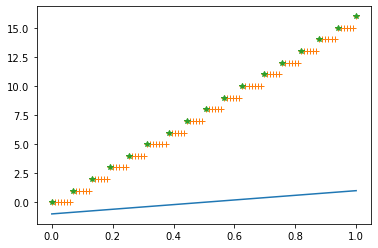

In [6]:
plt.plot(time, signal)
plt.plot(time, quantized,"+")
plt.plot(time[indexes], lcadc, '*')

In [7]:
time = np.linspace(0, 1, 101)
signal = 1 - 2*time
quantized = convert_array(signal, 1, 4, bipolar=True)
indexes, lcadc = convert_lcadc(signal, 1, 4, bipolar=True)

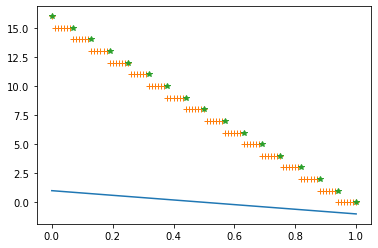

In [8]:
plt.plot(time, signal)
plt.plot(time, quantized,"+")
plt.plot(time[indexes], lcadc, '*')

## Verifying the ADC conversion

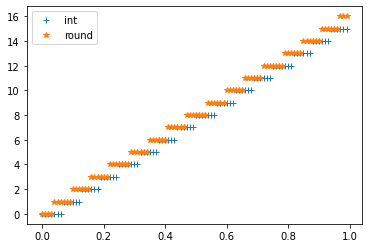

In [9]:
fs = 100
time = np.arange(0, 1, 1/fs)
signal = -1 + 2*time
quantized_int = convert_array(signal, 1, 4, bipolar=True, operator=int)
quantized_round = convert_array(signal, 1, 4, bipolar=True, operator=round)
plt.plot(time, quantized_int,"+", label="int")
plt.plot(time, quantized_round,"*", label="round")
plt.legend()

In [10]:
from eapprocessor.tools.fft import fft

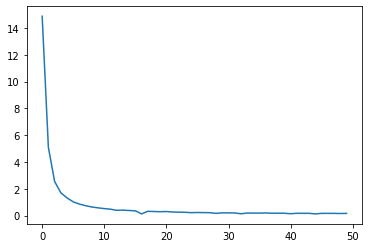

In [11]:
xf, yf = fft(quantized_int, fs)
plt.plot(xf,yf)

In [12]:
import itertools
import pandas as pd
from pathlib import Path

In [13]:
#Defining parameters
F=[1,2,5,10,25]
fs=[100.0]
t_stop=[4]
resolutions=[12,8,4]
operators=[int, round]
operators_names =[
    "int",
    "round"
]
map_operator_name_to_operator= dict(zip(operators_names,operators))
map_operator_to_operator_name= {y:x for x,y in map_operator_name_to_operator.items()}

In [14]:
args = [list(x) for x in itertools.product(fs, t_stop,F,resolutions,operators_names)]
args

[[100.0, 4, 1, 12, 'int'],
 [100.0, 4, 1, 12, 'round'],
 [100.0, 4, 1, 8, 'int'],
 [100.0, 4, 1, 8, 'round'],
 [100.0, 4, 1, 4, 'int'],
 [100.0, 4, 1, 4, 'round'],
 [100.0, 4, 2, 12, 'int'],
 [100.0, 4, 2, 12, 'round'],
 [100.0, 4, 2, 8, 'int'],
 [100.0, 4, 2, 8, 'round'],
 [100.0, 4, 2, 4, 'int'],
 [100.0, 4, 2, 4, 'round'],
 [100.0, 4, 5, 12, 'int'],
 [100.0, 4, 5, 12, 'round'],
 [100.0, 4, 5, 8, 'int'],
 [100.0, 4, 5, 8, 'round'],
 [100.0, 4, 5, 4, 'int'],
 [100.0, 4, 5, 4, 'round'],
 [100.0, 4, 10, 12, 'int'],
 [100.0, 4, 10, 12, 'round'],
 [100.0, 4, 10, 8, 'int'],
 [100.0, 4, 10, 8, 'round'],
 [100.0, 4, 10, 4, 'int'],
 [100.0, 4, 10, 4, 'round'],
 [100.0, 4, 25, 12, 'int'],
 [100.0, 4, 25, 12, 'round'],
 [100.0, 4, 25, 8, 'int'],
 [100.0, 4, 25, 8, 'round'],
 [100.0, 4, 25, 4, 'int'],
 [100.0, 4, 25, 4, 'round']]

In [15]:
def evaluate_parameters(*args):
    time = np.arange(0, args[1], 1/args[0])
    signal = np.sin(2*np.pi*time*args[2])
    quantized = convert_array(signal, 1, args[3], bipolar=True, operator=map_operator_name_to_operator[args[4]])
    xf, yf = fft(quantized - np.mean(quantized), args[0])
    return {
        "time": time,
        "quantized":quantized,
        "xf":xf,
        "yf":yf
    }

In [16]:
rows = [ x + [evaluate_parameters(*x)] for x in args]

In [17]:
df = pd.DataFrame(rows, columns=['fs', 't_stop', 'F', 'resolution', 'type','result'])
df

,fs,t_stop,F,resolution,type,result
0,100.0,4,1,12,int,"{'time': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0..."
1,100.0,4,1,12,round,"{'time': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0..."
2,100.0,4,1,8,int,"{'time': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0..."
3,100.0,4,1,8,round,"{'time': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0..."
4,100.0,4,1,4,int,"{'time': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0..."
5,100.0,4,1,4,round,"{'time': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0..."
6,100.0,4,2,12,int,"{'time': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0..."
7,100.0,4,2,12,round,"{'time': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0..."
8,100.0,4,2,8,int,"{'time': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0..."
9,100.0,4,2,8,round,"{'time': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0..."


In [18]:
ndf = pd.DataFrame(df["result"].to_list(), index=df.index)
df[ndf.columns] = ndf
df.drop(columns=["result"], inplace=True)
df

,fs,t_stop,F,resolution,type,time,quantized,xf,yf
0,100.0,4,1,12,int,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[2048, 2176, 2304, 2431, 2557, 2680, 2801, 291...","[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...","[1.3869794202037155e-13, 0.00499999999998963, ..."
1,100.0,4,1,12,round,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[2048, 2177, 2305, 2432, 2557, 2681, 2802, 292...","[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...","[0.0, 2.5316619775722685e-14, 4.00637347267256..."
2,100.0,4,1,8,int,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[128, 136, 144, 151, 159, 167, 175, 182, 189, ...","[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...","[8.668621376273222e-15, 0.004999999999998622, ..."
3,100.0,4,1,8,round,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[128, 136, 144, 152, 160, 168, 175, 182, 190, ...","[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...","[0.0, 3.156260716696956e-15, 3.803868380436038..."
4,100.0,4,1,4,int,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[8, 8, 9, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13...","[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...","[5.417888360170764e-16, 0.004999999999999864, ..."
5,100.0,4,1,4,round,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[8, 9, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 1...","[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...","[0.0, 2.140650820114389e-16, 1.950281094029877..."
6,100.0,4,2,12,int,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[2048, 2304, 2557, 2801, 3034, 3251, 3449, 362...","[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...","[0.0, 0.00555570233019071, 0.00923879532511913..."
7,100.0,4,2,12,round,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[2048, 2305, 2557, 2802, 3035, 3252, 3450, 362...","[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...","[0.0, 6.4558978841758204e-15, 4.81601022311435..."
8,100.0,4,2,8,int,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[128, 144, 159, 175, 189, 203, 215, 226, 236, ...","[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...","[0.0, 0.005555702330195832, 0.0092387953251108..."
9,100.0,4,2,8,round,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[128, 144, 160, 175, 190, 203, 216, 227, 236, ...","[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...","[0.0, 2.6896237178708683e-16, 2.22837713012596..."


In [19]:
ndf = df.loc[df['F']==1,:].copy()
ndf

,fs,t_stop,F,resolution,type,time,quantized,xf,yf
0,100.0,4,1,12,int,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[2048, 2176, 2304, 2431, 2557, 2680, 2801, 291...","[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...","[1.3869794202037155e-13, 0.00499999999998963, ..."
1,100.0,4,1,12,round,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[2048, 2177, 2305, 2432, 2557, 2681, 2802, 292...","[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...","[0.0, 2.5316619775722685e-14, 4.00637347267256..."
2,100.0,4,1,8,int,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[128, 136, 144, 151, 159, 167, 175, 182, 189, ...","[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...","[8.668621376273222e-15, 0.004999999999998622, ..."
3,100.0,4,1,8,round,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[128, 136, 144, 152, 160, 168, 175, 182, 190, ...","[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...","[0.0, 3.156260716696956e-15, 3.803868380436038..."
4,100.0,4,1,4,int,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[8, 8, 9, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13...","[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...","[5.417888360170764e-16, 0.004999999999999864, ..."
5,100.0,4,1,4,round,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[8, 9, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 1...","[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...","[0.0, 2.140650820114389e-16, 1.950281094029877..."


In [20]:
def plot_results_for_sin(df, F):
    ndf = df.loc[df['F']==F,:].copy()
    res = ndf["resolution"].unique()
    fig = plt.figure(figsize=(14,14))
    axes = fig.subplots(nrows=len(res), ncols=3)
    types = ["int", "round"]
    marks = ["+", "*"]

    for n_res, ax in zip(res,axes):
        sel = ndf.loc[ndf["resolution"]==n_res].copy()

        for i, n_type in enumerate(types):
            sel_type = sel.loc[sel["type"]==n_type].copy()
            sel_type
            ax[0].plot(sel_type["time"].values[0],
                       sel_type["quantized"].values[0], marks[i], 
                       label=f"Method='{n_type}'")

            ax[i+1].plot(sel_type["xf"].values[0],sel_type["yf"].values[0],label="FFT")
            ax[i+1].grid()
            ax[i+1].set_title(f"FFT for method '{n_type}'")
            ax[i+1].set_xlabel("Frequency (Hz)")

        ax[0].grid()
        ax[0].legend(loc="best")
        ax[0].set_xlabel("Time")
        ax[0].set_ylabel("Quantizer value")
        ax[0].set_title(f"Signals with resolution={n_res}")

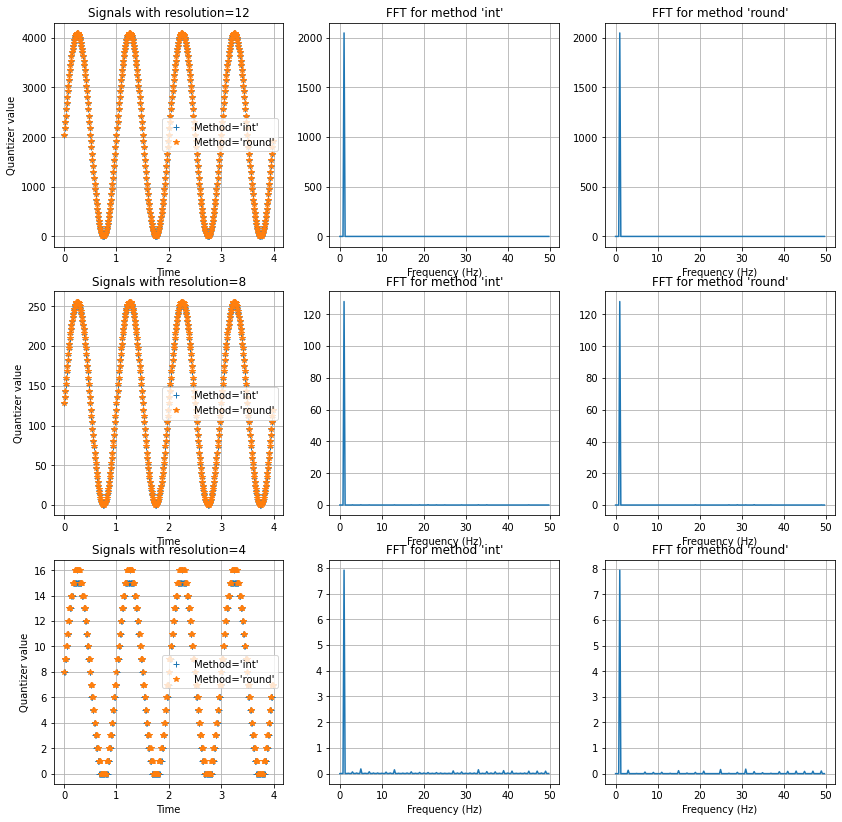

In [21]:
plot_results_for_sin(df,1)

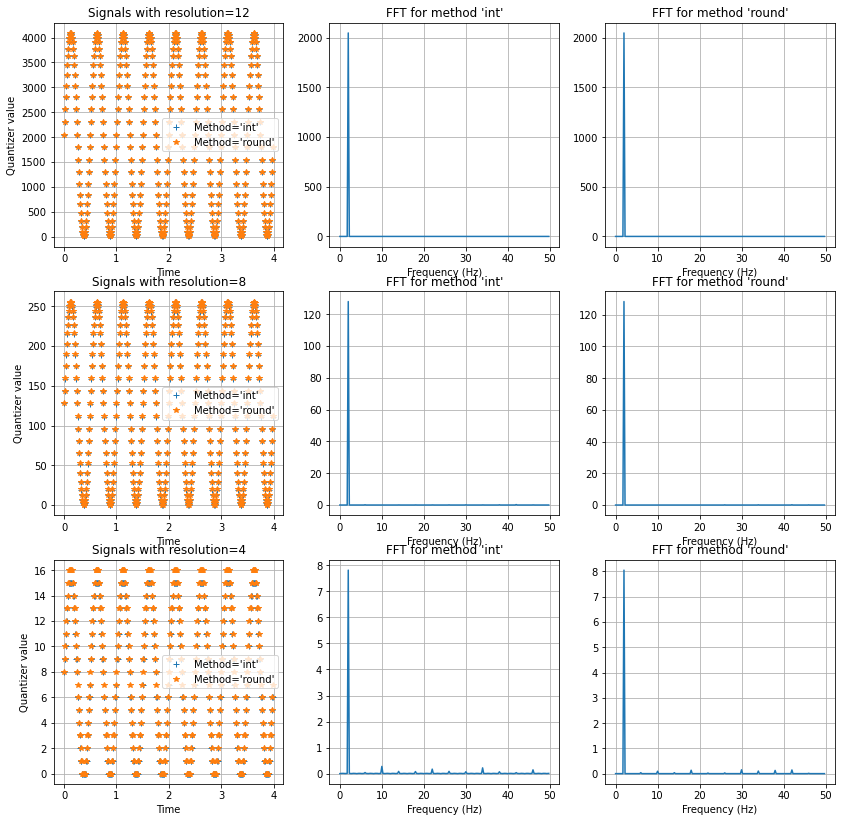

In [22]:
plot_results_for_sin(df,2)

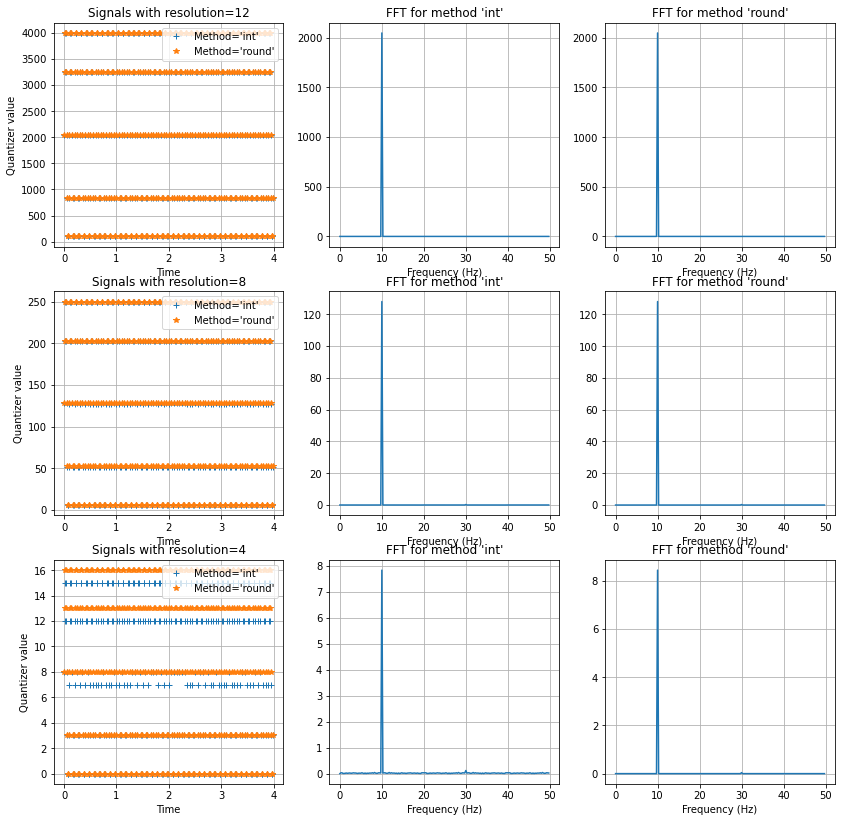

In [23]:
plot_results_for_sin(df,10)

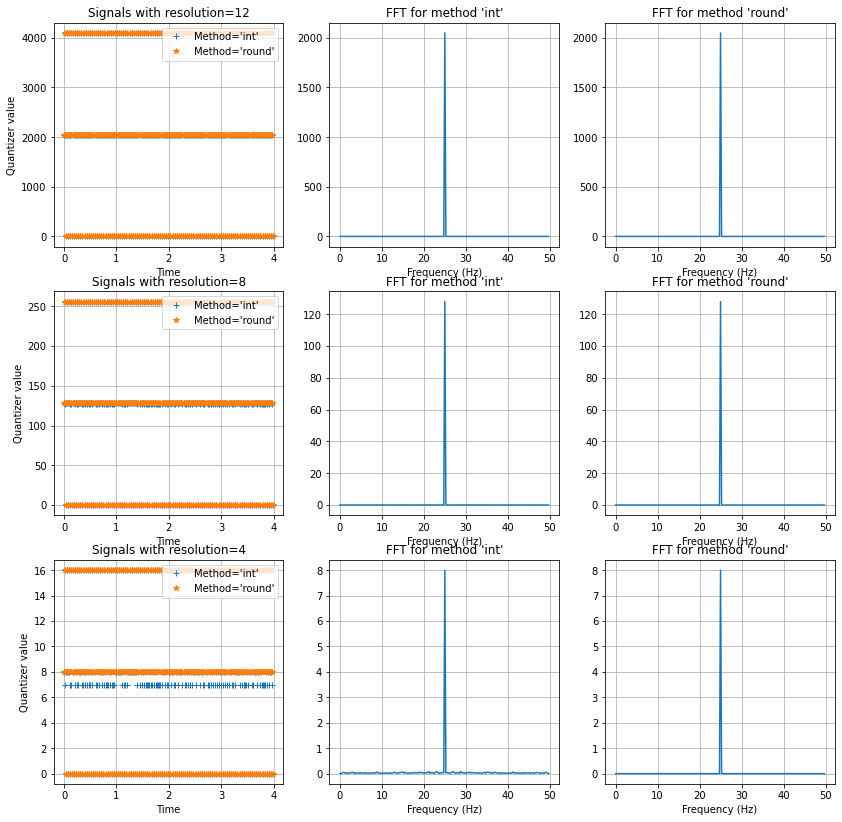

In [24]:
plot_results_for_sin(df,25)

## Test LCADC

In [25]:
import numpy as np
import matplotlib.pylab as plt
from eapprocessor.hwsimulator.adc import convert_array, convert_lcadc, dac

In [26]:
# Define parameters
operators = [int, round]
operators_names = ["int", "round"]
v_ref = 1
resolution = 4
fs = 100 
F = 1

In [27]:
def compare_adc_lcadc(v_ref, resolution, fs, F, operators, operators_names, axes=None):

    if axes is None:
        fig = plt.figure(figsize=(12,6))
        axes = fig.subplots(nrows=1, ncols=len(operators))
        
    for i, op, op_name in zip (range(len(operators)),operators, operators_names):
        time = np.arange(0, 1, 1/fs)
        signal = np.sin(2 * np.pi * time*F)
        quantized = convert_array(signal, v_ref, resolution, bipolar=True, operator=op)
        indexes, lcadc = convert_lcadc(signal, v_ref, resolution, bipolar=True, operator=op)

        axes[i].plot(time, signal, label="Original signal")
        axes[i].plot(time, dac(quantized, v_ref,resolution,True),"+", label="Normal ADC")
        axes[i].plot(time[indexes], dac(lcadc, v_ref,resolution,True), '*', label="LCADC")
        axes[i].legend()
        axes[i].grid()
        axes[i].set_title(f"Conversion with method '{op_name}'")
        axes[i].set_xlabel("Time (s)")
        axes[i].set_ylabel("Amplitude")

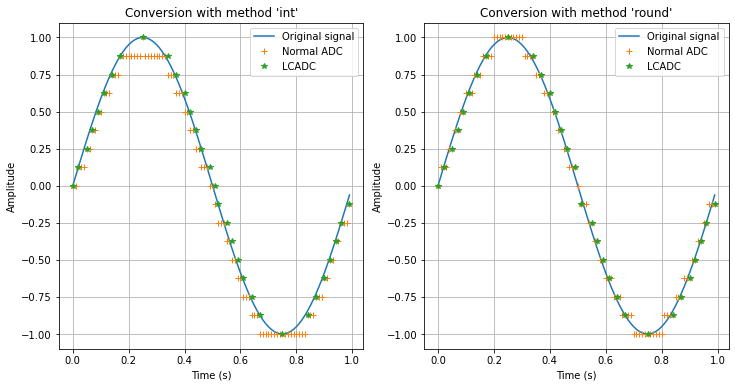

In [28]:
compare_adc_lcadc(v_ref, resolution, fs, 1, operators, operators_names)

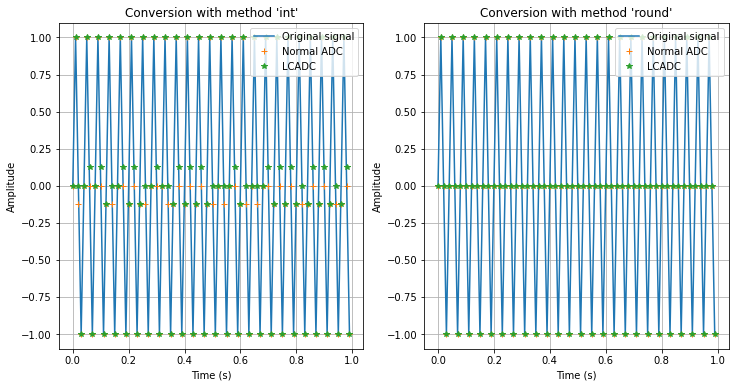

In [29]:
compare_adc_lcadc(v_ref, resolution, fs, fs/4, operators, operators_names)